# NASA -  Asteroids  - Their closest approach date to Earth

In [1]:
# Data Source: https://api.nasa.gov/
# Topic:  Retrieve a list of Asteroids based on their closest approach date to Earth


# Imports

In [2]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Connecting, reading and cleaning the data

In [3]:
# Retrieve data using online API and assigning variable
asteroids = requests.get("https://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-07&end_date=2015-09-08&api_key=DEMO_KEY")

In [4]:
# Check if we have connectivity -- we should get 200
asteroids.status_code

200

In [5]:
# Reading the data in json format to understand what type of information I am dealing with
asteroids.json()

{'links': {'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-08&end_date=2015-09-09&detailed=false&api_key=DEMO_KEY',
  'previous': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-06&end_date=2015-09-07&detailed=false&api_key=DEMO_KEY',
  'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-07&end_date=2015-09-08&detailed=false&api_key=DEMO_KEY'},
 'element_count': 25,
 'near_earth_objects': {'2015-09-08': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2465633?api_key=DEMO_KEY'},
    'id': '2465633',
    'neo_reference_id': '2465633',
    'name': '465633 (2009 JR5)',
    'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2465633',
    'absolute_magnitude_h': 20.48,
    'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.2130860292,
      'estimated_diameter_max': 0.4764748465},
     'meters': {'estimated_diameter_min': 213.0860292484,
      'estimated_diameter_max': 476.474846455},
     'miles': {'estimated_diameter_min': 

In [6]:
# Assign variable to the json and create a dictionary
asteoroids_dict = asteroids.json()

In [7]:
# Retrieving the keys
asteoroids_dict.keys()

dict_keys(['links', 'element_count', 'near_earth_objects'])

In [8]:
# I will read the data from the dictionary "near_earth_objects", at this point the format is not the best to use
asteoroids_dict ['near_earth_objects']

{'2015-09-08': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2465633?api_key=DEMO_KEY'},
   'id': '2465633',
   'neo_reference_id': '2465633',
   'name': '465633 (2009 JR5)',
   'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2465633',
   'absolute_magnitude_h': 20.48,
   'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.2130860292,
     'estimated_diameter_max': 0.4764748465},
    'meters': {'estimated_diameter_min': 213.0860292484,
     'estimated_diameter_max': 476.474846455},
    'miles': {'estimated_diameter_min': 0.1324054791,
     'estimated_diameter_max': 0.2960676518},
    'feet': {'estimated_diameter_min': 699.1011681995,
     'estimated_diameter_max': 1563.2377352435}},
   'is_potentially_hazardous_asteroid': True,
   'close_approach_data': [{'close_approach_date': '2015-09-08',
     'close_approach_date_full': '2015-Sep-08 20:28',
     'epoch_date_close_approach': 1441744080000,
     'relative_velocity': {'kilometers_per_second': '18.127937

In [9]:
# I am looking more into the data by using the dictionary near_earth_objects and asign a new variable to it : near_earth_objects_dict
near_earth_objects_dict = asteoroids_dict ['near_earth_objects']

In [10]:
# Reading again the keys of the dictionary that I will use
near_earth_objects_dict.keys()

dict_keys(['2015-09-08', '2015-09-07'])

In [11]:
# let's see what type of information we can find in each dictionay from near_earth_objects_dict and we will assign a new variable called: first_near_earth_objects_dict for each key of the dictionary
near_earth_objects_dict['2015-09-07']

[{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2440012?api_key=DEMO_KEY'},
  'id': '2440012',
  'neo_reference_id': '2440012',
  'name': '440012 (2002 LE27)',
  'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2440012',
  'absolute_magnitude_h': 19.61,
  'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.3180936332,
    'estimated_diameter_max': 0.7112789871},
   'meters': {'estimated_diameter_min': 318.0936332215,
    'estimated_diameter_max': 711.2789870931},
   'miles': {'estimated_diameter_min': 0.197654159,
    'estimated_diameter_max': 0.4419681355},
   'feet': {'estimated_diameter_min': 1043.6143156183,
    'estimated_diameter_max': 2333.5925520145}},
  'is_potentially_hazardous_asteroid': False,
  'close_approach_data': [{'close_approach_date': '2015-09-07',
    'close_approach_date_full': '2015-Sep-07 07:32',
    'epoch_date_close_approach': 1441611120000,
    'relative_velocity': {'kilometers_per_second': '1.1630843052',
     'kilometers_per_hou

In [12]:
# create a dataframe for each key
df_first_near_earth_objects= pd.DataFrame(near_earth_objects_dict['2015-09-07'])
df_seccond_near_earth_objects = pd.DataFrame(near_earth_objects_dict['2015-09-08'])

In [13]:
# check first dataframe created
df_first_near_earth_objects.head(5)

,links,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude_h,estimated_diameter,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object
0,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2440012,2440012,440012 (2002 LE27),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2440012,19.61,{'kilometers': {'estimated_diameter_min': 0.31...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False
1,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,3713989,3713989,(2015 FC35),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3713989,22.10,{'kilometers': {'estimated_diameter_min': 0.10...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False
2,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,3726788,3726788,(2015 RG2),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3726788,26.70,{'kilometers': {'estimated_diameter_min': 0.01...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False
3,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,3727036,3727036,(2015 RL35),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3727036,26.30,{'kilometers': {'estimated_diameter_min': 0.01...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False
4,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,3727179,3727179,(2015 RH36),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3727179,23.60,{'kilometers': {'estimated_diameter_min': 0.05...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False


In [14]:
# check second dataframe created
df_seccond_near_earth_objects.head(5)

,links,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude_h,estimated_diameter,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object
0,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2465633,2465633,465633 (2009 JR5),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2465633,20.48,{'kilometers': {'estimated_diameter_min': 0.21...,True,"[{'close_approach_date': '2015-09-08', 'close_...",False
1,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,3426410,3426410,(2008 QV11),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3426410,21.34,{'kilometers': {'estimated_diameter_min': 0.14...,False,"[{'close_approach_date': '2015-09-08', 'close_...",False
2,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,3553060,3553060,(2010 XT10),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3553060,26.50,{'kilometers': {'estimated_diameter_min': 0.01...,False,"[{'close_approach_date': '2015-09-08', 'close_...",False
3,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,3726710,3726710,(2015 RC),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3726710,24.30,{'kilometers': {'estimated_diameter_min': 0.03...,False,"[{'close_approach_date': '2015-09-08', 'close_...",False
4,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,3727181,3727181,(2015 RO36),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3727181,22.90,{'kilometers': {'estimated_diameter_min': 0.06...,False,"[{'close_approach_date': '2015-09-08', 'close_...",False


In [15]:
# I will concatenate the two data frames into one, this way it will be more efficient to work with the data.
concat_df_near_earth_objects = pd.concat([df_first_near_earth_objects, df_seccond_near_earth_objects])

 # check results of the concatenated data frame
concat_df_near_earth_objects.head(6)

,links,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude_h,estimated_diameter,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object
0,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2440012,2440012,440012 (2002 LE27),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2440012,19.61,{'kilometers': {'estimated_diameter_min': 0.31...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False
1,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,3713989,3713989,(2015 FC35),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3713989,22.10,{'kilometers': {'estimated_diameter_min': 0.10...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False
2,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,3726788,3726788,(2015 RG2),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3726788,26.70,{'kilometers': {'estimated_diameter_min': 0.01...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False
3,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,3727036,3727036,(2015 RL35),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3727036,26.30,{'kilometers': {'estimated_diameter_min': 0.01...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False
4,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,3727179,3727179,(2015 RH36),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3727179,23.60,{'kilometers': {'estimated_diameter_min': 0.05...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False
5,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,3727662,3727662,(2015 RX83),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3727662,22.90,{'kilometers': {'estimated_diameter_min': 0.06...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False


In [16]:
# Before moving forward, I want to check in detail my concatenated data frame (concat_df_near_earth_objects) and save it into csv format.
# I don't want to see the indexes in the csv file
concat_df_near_earth_objects.to_csv('Concat_Data.csv', index=False)

# I want get only the columns that I am intrested on, for that I exclude multiple columns by passing a list of column names to the indexing expression.
concat_df_near_earth_objects = concat_df_near_earth_objects.loc[:, ~concat_df_near_earth_objects.columns.isin(['links', 'nasa_jpl_url'])]

# Check results
concat_df_near_earth_objects

,id,neo_reference_id,name,absolute_magnitude_h,estimated_diameter,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object
0,2440012,2440012,440012 (2002 LE27),19.610,{'kilometers': {'estimated_diameter_min': 0.31...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False
1,3713989,3713989,(2015 FC35),22.100,{'kilometers': {'estimated_diameter_min': 0.10...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False
2,3726788,3726788,(2015 RG2),26.700,{'kilometers': {'estimated_diameter_min': 0.01...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False
3,3727036,3727036,(2015 RL35),26.300,{'kilometers': {'estimated_diameter_min': 0.01...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False
4,3727179,3727179,(2015 RH36),23.600,{'kilometers': {'estimated_diameter_min': 0.05...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False
5,3727662,3727662,(2015 RX83),22.900,{'kilometers': {'estimated_diameter_min': 0.06...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False
6,3727663,3727663,(2015 RY83),24.200,{'kilometers': {'estimated_diameter_min': 0.03...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False
7,3759353,3759353,(2016 RU33),27.500,{'kilometers': {'estimated_diameter_min': 0.00...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False
8,3759690,3759690,(2016 RN41),31.028,{'kilometers': {'estimated_diameter_min': 0.00...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False
9,3827337,3827337,(2018 RZ2),22.200,{'kilometers': {'estimated_diameter_min': 0.09...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False


In [17]:
# Now that the data looks a bit better than before, I want to reset my indexes from 1 to X instead of seeing repeating indexes
# Reset the index and drop the old index
df_near_earth_objects = concat_df_near_earth_objects.reset_index(drop=True)

# Create a new index with sequential numbers
new_index = pd.Index(range(len(df_near_earth_objects)))

# Set the new index as the index of the dataframe
df_near_earth_objects = df_near_earth_objects.set_index(new_index)

# Check the new results with the new index from the data frame (the data frame was also renamed as we first started from the dictionary)
df_near_earth_objects.head(20)


,id,neo_reference_id,name,absolute_magnitude_h,estimated_diameter,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object
0,2440012,2440012,440012 (2002 LE27),19.610,{'kilometers': {'estimated_diameter_min': 0.31...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False
1,3713989,3713989,(2015 FC35),22.100,{'kilometers': {'estimated_diameter_min': 0.10...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False
2,3726788,3726788,(2015 RG2),26.700,{'kilometers': {'estimated_diameter_min': 0.01...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False
3,3727036,3727036,(2015 RL35),26.300,{'kilometers': {'estimated_diameter_min': 0.01...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False
4,3727179,3727179,(2015 RH36),23.600,{'kilometers': {'estimated_diameter_min': 0.05...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False
5,3727662,3727662,(2015 RX83),22.900,{'kilometers': {'estimated_diameter_min': 0.06...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False
6,3727663,3727663,(2015 RY83),24.200,{'kilometers': {'estimated_diameter_min': 0.03...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False
7,3759353,3759353,(2016 RU33),27.500,{'kilometers': {'estimated_diameter_min': 0.00...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False
8,3759690,3759690,(2016 RN41),31.028,{'kilometers': {'estimated_diameter_min': 0.00...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False
9,3827337,3827337,(2018 RZ2),22.200,{'kilometers': {'estimated_diameter_min': 0.09...,False,"[{'close_approach_date': '2015-09-07', 'close_...",False


# Dealing with: JSON - Nested Fields: Preparations

In [18]:
print(df_near_earth_objects['estimated_diameter'])

0     {'kilometers': {'estimated_diameter_min': 0.31...
1     {'kilometers': {'estimated_diameter_min': 0.10...
2     {'kilometers': {'estimated_diameter_min': 0.01...
3     {'kilometers': {'estimated_diameter_min': 0.01...
4     {'kilometers': {'estimated_diameter_min': 0.05...
5     {'kilometers': {'estimated_diameter_min': 0.06...
6     {'kilometers': {'estimated_diameter_min': 0.03...
7     {'kilometers': {'estimated_diameter_min': 0.00...
8     {'kilometers': {'estimated_diameter_min': 0.00...
9     {'kilometers': {'estimated_diameter_min': 0.09...
10    {'kilometers': {'estimated_diameter_min': 0.18...
11    {'kilometers': {'estimated_diameter_min': 0.03...
12    {'kilometers': {'estimated_diameter_min': 0.01...
13    {'kilometers': {'estimated_diameter_min': 0.21...
14    {'kilometers': {'estimated_diameter_min': 0.14...
15    {'kilometers': {'estimated_diameter_min': 0.01...
16    {'kilometers': {'estimated_diameter_min': 0.03...
17    {'kilometers': {'estimated_diameter_min': 

In [19]:
# Nested filed: estimated_diameter
# Define a function to extract data from nested fields, from estimated_diameter I will take only the estimated_diameter in kilometers
def extract_data(row):
    row['diameter_min_km'] = row['estimated_diameter']['kilometers']['estimated_diameter_min']
    row['diameter_max_km'] = row['estimated_diameter']['kilometers']['estimated_diameter_max']
    return row

# Apply the function to each row of the data frame
df_near_earth_objects = df_near_earth_objects.apply(extract_data, axis=1)

# Drop the original 'estimated_diameter' column, the new columns will be available at the end estimated_diameter_min and estimated_diameter_max
df_near_earth_objects = df_near_earth_objects.drop('estimated_diameter', axis=1)

print(df_near_earth_objects)

          id neo_reference_id                name  absolute_magnitude_h  \
0    2440012          2440012  440012 (2002 LE27)                19.610   
1    3713989          3713989         (2015 FC35)                22.100   
2    3726788          3726788          (2015 RG2)                26.700   
3    3727036          3727036         (2015 RL35)                26.300   
4    3727179          3727179         (2015 RH36)                23.600   
5    3727662          3727662         (2015 RX83)                22.900   
6    3727663          3727663         (2015 RY83)                24.200   
7    3759353          3759353         (2016 RU33)                27.500   
8    3759690          3759690         (2016 RN41)                31.028   
9    3827337          3827337          (2018 RZ2)                22.200   
10   3843641          3843641          (2019 QK4)                20.800   
11   3986741          3986741           (2020 BY)                24.500   
12  54088823         5408

In [20]:
# nested filed: close_approach_data
# Lambda functions are useful in this context because they are concise and can be defined quickly, and they can be easily passed as an argument to the apply() method without the need to define a separate function.
# since I used the kilometersin the previous nested field I will use the same for this nested field
# extract the nested fields into separate columns
df_near_earth_objects['close_approach_date'] = df_near_earth_objects['close_approach_data'].apply(lambda x: x[0]['close_approach_date'])
df_near_earth_objects['close_approach_date_full'] = df_near_earth_objects['close_approach_data'].apply(lambda x: x[0]['close_approach_date_full'])
df_near_earth_objects['epoch_date_close_approach'] = df_near_earth_objects['close_approach_data'].apply(lambda x: x[0]['epoch_date_close_approach'])
df_near_earth_objects['relative_velocity_kms'] = df_near_earth_objects['close_approach_data'].apply(lambda x: x[0]['relative_velocity']['kilometers_per_second'])
df_near_earth_objects['relative_velocity_kmph'] = df_near_earth_objects['close_approach_data'].apply(lambda x: x[0]['relative_velocity']['kilometers_per_hour'])
df_near_earth_objects['miss_distance_astro'] = df_near_earth_objects['close_approach_data'].apply(lambda x: x[0]['miss_distance']['astronomical'])
df_near_earth_objects['miss_distance_lunar'] = df_near_earth_objects['close_approach_data'].apply(lambda x: x[0]['miss_distance']['lunar'])
df_near_earth_objects['miss_distance_kms'] = df_near_earth_objects['close_approach_data'].apply(lambda x: x[0]['miss_distance']['kilometers'])
df_near_earth_objects['orbiting_body'] = df_near_earth_objects['close_approach_data'].apply(lambda x: x[0]['orbiting_body'])

# drop the original nested column
df_near_earth_objects = df_near_earth_objects.drop('close_approach_data', axis=1)

# in column close_approach_date_full  we have the date and hour:minutes , I want to create another column but only with the hour and minutes
df_near_earth_objects['close_approach_time'] = pd.to_datetime(df_near_earth_objects['close_approach_date_full']).dt.strftime('%H:%M')

print(df_near_earth_objects)

          id neo_reference_id                name  absolute_magnitude_h  \
0    2440012          2440012  440012 (2002 LE27)                19.610   
1    3713989          3713989         (2015 FC35)                22.100   
2    3726788          3726788          (2015 RG2)                26.700   
3    3727036          3727036         (2015 RL35)                26.300   
4    3727179          3727179         (2015 RH36)                23.600   
5    3727662          3727662         (2015 RX83)                22.900   
6    3727663          3727663         (2015 RY83)                24.200   
7    3759353          3759353         (2016 RU33)                27.500   
8    3759690          3759690         (2016 RN41)                31.028   
9    3827337          3827337          (2018 RZ2)                22.200   
10   3843641          3843641          (2019 QK4)                20.800   
11   3986741          3986741           (2020 BY)                24.500   
12  54088823         5408

In [21]:
# rearrange the columns
df_near_earth_objects = df_near_earth_objects.reindex(columns=['id','orbiting_body','neo_reference_id','name', 'absolute_magnitude_h', 'is_potentially_hazardous_asteroid', 'is_sentry_object',	'diameter_min_km',	'diameter_max_km', 'close_approach_date', 'close_approach_date_full', 'close_approach_time', 'epoch_date_close_approach','relative_velocity_kms','relative_velocity_kmph','miss_distance_astro', 'miss_distance_lunar','miss_distance_kms'])
print(df_near_earth_objects)

          id orbiting_body neo_reference_id                name  \
0    2440012         Earth          2440012  440012 (2002 LE27)   
1    3713989         Earth          3713989         (2015 FC35)   
2    3726788         Earth          3726788          (2015 RG2)   
3    3727036         Earth          3727036         (2015 RL35)   
4    3727179         Earth          3727179         (2015 RH36)   
5    3727662         Earth          3727662         (2015 RX83)   
6    3727663         Earth          3727663         (2015 RY83)   
7    3759353         Earth          3759353         (2016 RU33)   
8    3759690         Earth          3759690         (2016 RN41)   
9    3827337         Earth          3827337          (2018 RZ2)   
10   3843641         Earth          3843641          (2019 QK4)   
11   3986741         Earth          3986741           (2020 BY)   
12  54088823         Earth         54088823           (2020 WZ)   
13   2465633         Earth          2465633   465633 (2009 JR5

In [22]:
# Sort the dataframe by the 'name' column
df_near_earth_objects = df_near_earth_objects.sort_values('name')
print(df_near_earth_objects)

          id orbiting_body neo_reference_id                name  \
14   3426410         Earth          3426410         (2008 QV11)   
15   3553060         Earth          3553060         (2010 XT10)   
1    3713989         Earth          3713989         (2015 FC35)   
16   3726710         Earth          3726710           (2015 RC)   
2    3726788         Earth          3726788          (2015 RG2)   
4    3727179         Earth          3727179         (2015 RH36)   
3    3727036         Earth          3727036         (2015 RL35)   
18   3727639         Earth          3727639         (2015 RN83)   
17   3727181         Earth          3727181         (2015 RO36)   
5    3727662         Earth          3727662         (2015 RX83)   
6    3727663         Earth          3727663         (2015 RY83)   
19   3730577         Earth          3730577        (2015 TX237)   
20   3731587         Earth          3731587           (2015 UG)   
21   3747356         Earth          3747356        (2016 EK158

# Data Insights

Now that I have cleaned the data I can start looking into it

In [23]:
# Count how many potentially hazardous asteroids we have
count_hazardous_asteroids = df_near_earth_objects['is_potentially_hazardous_asteroid'].sum()
print(count_hazardous_asteroids)

# Select the rows where is_potentially_hazardous_asteroid is True
hazardous_asteroids = df_near_earth_objects[df_near_earth_objects['is_potentially_hazardous_asteroid'] == True]

# Select only the 'name', 'close_approach_date', 'close_approach_time', 'diameter_min_km' and 'diameter_max_km' columns
hazardous_asteroids_name = hazardous_asteroids[['name', 'close_approach_date', 'close_approach_time','diameter_min_km','diameter_max_km']]

# Print the data frame without the index
print(hazardous_asteroids_name.to_string(index=False))

1
             name close_approach_date close_approach_time  diameter_min_km  diameter_max_km
465633 (2009 JR5)          2015-09-08               20:28         0.213086         0.476475


In [24]:
# Calculate the mean of absolute_magnitude_h and round to 2 decimal places using numpy
mean = np.mean(df_near_earth_objects['absolute_magnitude_h'])
mean_rounded = round(mean, 2)
print(mean_rounded)

23.85


In [25]:
# How many orbiting asteroids we have per day around Earth

# Convert date column to datetime object
df_near_earth_objects['close_approach_date'] = pd.to_datetime(df_near_earth_objects['close_approach_date'])

# Group by date and count id
count_earth_objects = df_near_earth_objects.groupby(df_near_earth_objects['close_approach_date'].dt.date)['id'].count()

print(count_earth_objects)


close_approach_date
2015-09-07    13
2015-09-08    12
Name: id, dtype: int64


In [26]:
# Average diameter of the asteroid
# selecting the columns 'diameter_min_km' and 'diameter_max_km' from the pandas dataframe 'df_near_earth_objects'.
# Average diameter of the asteroids by adding the two columns together and dividing by 2, and storing the result
df_near_earth_objects['avg_diameter_km'] = (df_near_earth_objects['diameter_min_km'] + df_near_earth_objects['diameter_max_km']) / 2
avg_diameter = df_near_earth_objects['avg_diameter_km'].mean()
name = df_near_earth_objects.loc[df_near_earth_objects['avg_diameter_km'].idxmax()]['name']

print("The asteroid with the largest diameter is {} with an average diameter of {:.2f} km".format(name, avg_diameter))


The asteroid with the largest diameter is 440012 (2002 LE27) with an average diameter of 0.13 km


In [27]:
# Return top 5 asteroids with highest relative_velocity_kmph
top_5_fastest = df_near_earth_objects.sort_values('relative_velocity_kmph', ascending=False).head(5)

print("Top 5 fastest asteroids based on relative velocity (km/h):\n")
print(top_5_fastest[['name', 'relative_velocity_kmph','close_approach_date_full']])

Top 5 fastest asteroids based on relative velocity (km/h):

           name relative_velocity_kmph close_approach_date_full
11    (2020 BY)       97883.7299230601        2015-Sep-07 05:39
5   (2015 RX83)        9700.4054267199        2015-Sep-07 21:51
12    (2020 WZ)       72279.8474933128        2015-Sep-07 19:56
14  (2008 QV11)       71099.3261312856        2015-Sep-08 14:31
16    (2015 RC)       70151.9167909206        2015-Sep-08 09:45


# Visualisation

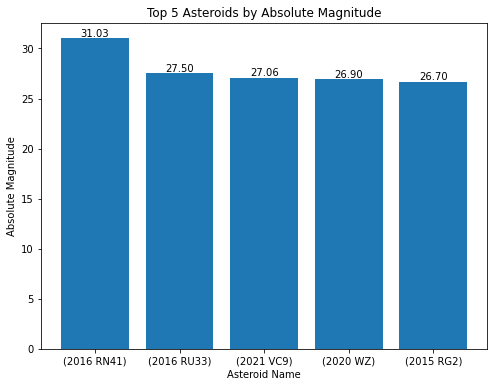

In [28]:

# Get the top 5 asteroids by absolute magnitude
top_5_abs_mag = df_near_earth_objects.nlargest(5, 'absolute_magnitude_h')

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(top_5_abs_mag['name'], top_5_abs_mag['absolute_magnitude_h'])

# Add the values on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
            ha='center', va='bottom', fontsize=10)

# Add labels and title
ax.set_xlabel('Asteroid Name')
ax.set_ylabel('Absolute Magnitude')
ax.set_title('Top 5 Asteroids by Absolute Magnitude')

plt.show()

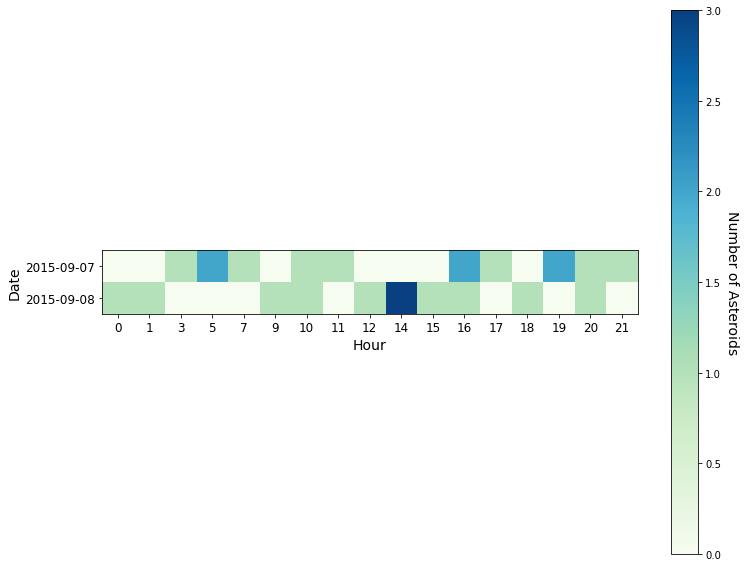

In [29]:

# extract date and time components
df_near_earth_objects['date'] = pd.to_datetime(df_near_earth_objects['close_approach_date'])
df_near_earth_objects['hour'] = pd.to_datetime(df_near_earth_objects['close_approach_time']).dt.hour

# create a pivot table to count the number of ids(Asteroids) per date and hour
pivot_table = pd.pivot_table(df_near_earth_objects, values='id', index=['date'], columns=['hour'], aggfunc=len, fill_value=0)

# plot the pivot table as a heatmap
fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(pivot_table, cmap='GnBu')

# add axis labels
ax.set_xticks(range(len(pivot_table.columns)))
ax.set_yticks(range(len(pivot_table.index)))
ax.set_xticklabels(pivot_table.columns, fontsize=12)
ax.set_yticklabels(pivot_table.index.date, fontsize=12)
ax.set_xlabel('Hour', fontsize=14)
ax.set_ylabel('Date', fontsize=14)

# add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Number of Asteroids", rotation=-90, va="bottom", fontsize=14)

# show plot
plt.show()